In [1]:
%matplotlib inline

In [2]:
import warnings 
warnings.filterwarnings('ignore')
from mocpy import MOC

In [3]:
from astroquery.vizier import Vizier

viz = Vizier(columns=['*', '_RAJ2000', '_DEJ2000'])
viz.ROW_LIMIT = -1
table = viz.get_catalogs('I/293/npm2cros')[0]

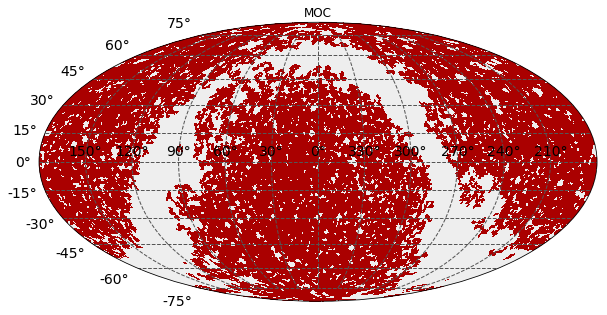

In [4]:
moc = MOC.from_moc_fits_file('demo-data/P-GALEXGR6-AIS-FUV.fits')
moc.plot()


In [5]:
print(table)

_RAJ2000 _DEJ2000   NPM2   KLA  RAJ2000    DEJ2000   ID  IQ  IN r_Star  mag  tyc
  deg      deg                  "h:m:s"    "d:m:s"                      mag     
-------- -------- -------- --- ---------- --------- --- --- --- ------ ----- ---
339.6383  83.1667 +83.0016 HPM 22 38 33.2 +83 10 00   1   0   0    811 14.20    
339.6383  83.1667 +83.0016 HPM 22 38 33.2 +83 10 00   1   0   0    813 14.20    
349.5308  83.0106 +83.0022 VAR 23 18 07.4 +83 00 38   0   0   0    843    --   T
349.5308  83.0106 +83.0022 SRA 23 18 07.4 +83 00 38   0   0   0      1  9.60   T
323.8542  82.9972 +82.0030 UBV 21 35 25.0 +82 59 50   0   0   0      5 10.08   T
332.1079  82.7475 +82.0055  WD 22 08 25.9 +82 44 51   0   0   0   1012 16.00    
332.9337  82.6078 +82.0059 HPM 22 11 44.1 +82 36 28   1   0   0    811 16.70    
335.0887  82.9708 +82.0065 HPM 22 20 21.3 +82 58 15   1   0   0    811 11.00   T
337.1192  82.7639 +82.0074 UBV 22 28 28.6 +82 45 50   0   0   0      5 10.42   T
337.2746  82.6622 +82.0075 H

In [6]:
indexes = moc.contains(table['_RAJ2000'], table['_DEJ2000'])
filtered_table = table[indexes]
print(filtered_table)

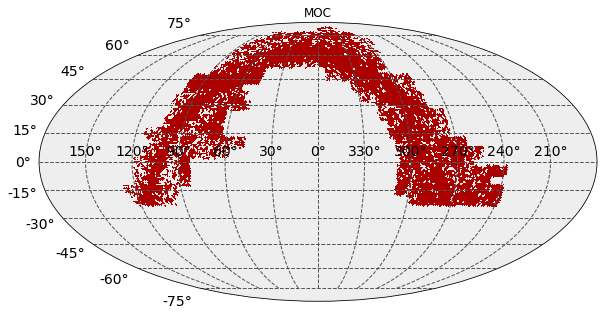

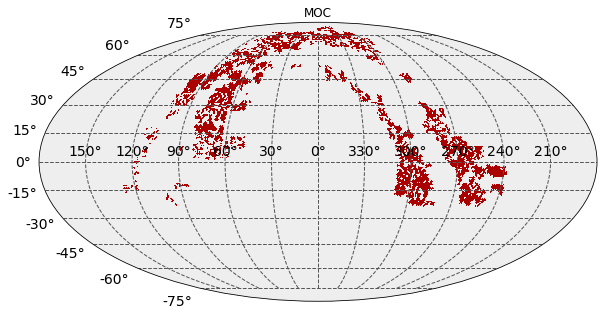

In [8]:
m1 = MOC.from_table(table, '_RAJ2000', '_DEJ2000', 6)

m2 = MOC.from_table(filtered_table, '_RAJ2000', '_DEJ2000', 6)

m1.plot()
m2.plot()